In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam['review_scores_checkin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: review_scores_checkin
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [11]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['review_scores_checkin'].max()
Min = Amsterdam['review_scores_checkin'].min()
Limites = [Min, Max]
Limites

[4.7, 5.0]

In [12]:
# Calculamos el rango R
R = Max - Min
R

0.2999999999999998

In [13]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [14]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.021082258008109186

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [15]:
# Categorización de variables
intervalos = np.linspace (4.7, 5, 15)
intervalos

array([4.7       , 4.72142857, 4.74285714, 4.76428571, 4.78571429,
       4.80714286, 4.82857143, 4.85      , 4.87142857, 4.89285714,
       4.91428571, 4.93571429, 4.95714286, 4.97857143, 5.        ])

In [17]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [18]:
# Creamos las ctegorias en la columna numerica
Amsterdam['review_scores_checkin'] = pd.cut ( x = Amsterdam ['review_scores_checkin'], bins = intervalos, labels = categorias )
Amsterdam['review_scores_checkin']

0        Categoria7
1       Categoria10
2        Categoria4
3       Categoria14
4        Categoria8
           ...     
9654    Categoria10
9655    Categoria10
9656    Categoria14
9657    Categoria10
9658    Categoria10
Name: review_scores_checkin, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [19]:
table1 = freq_tbl(Amsterdam['review_scores_checkin'])
table1

,review_scores_checkin,frequency,percentage,cumulative_perc
0,Categoria14,4098,0.424268,0.425810
1,Categoria10,2238,0.231701,0.658354
2,Categoria11,503,0.052076,0.710619
3,Categoria12,493,0.051040,0.761845
4,Categoria13,436,0.045139,0.807149
5,Categoria9,404,0.041826,0.849127
6,Categoria7,351,0.036339,0.885599
7,Categoria8,263,0.027228,0.912926
8,Categoria5,222,0.022984,0.935993
9,Categoria3,188,0.019464,0.955528


In [20]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_checkin,frequency
0,Categoria14,4098
1,Categoria10,2238
2,Categoria11,503
3,Categoria12,493
4,Categoria13,436
5,Categoria9,404
6,Categoria7,351
7,Categoria8,263
8,Categoria5,222
9,Categoria3,188


In [21]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_checkin')
Filtro_index

,frequency
review_scores_checkin,
Categoria14,4098
Categoria10,2238
Categoria11,503
Categoria12,493
Categoria13,436
Categoria9,404
Categoria7,351
Categoria8,263
Categoria5,222


Text(0, 0.5, 'Frecuencia')

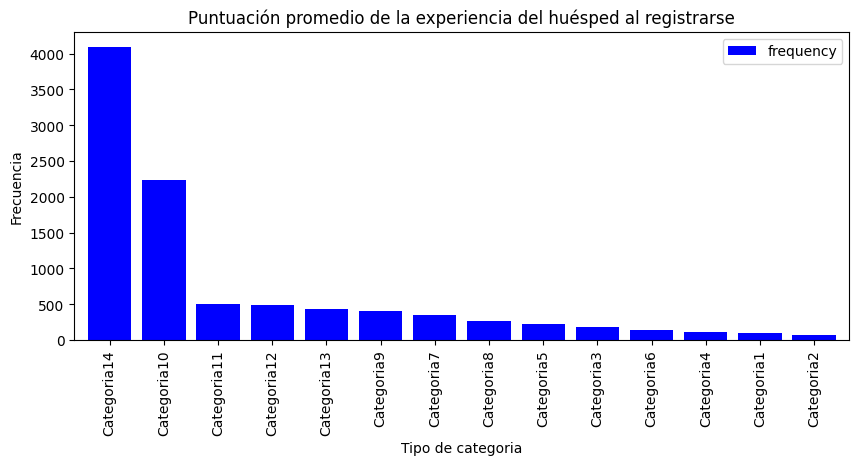

In [22]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de la experiencia del huésped al registrarse')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')